#Séance 2: Prédiction de churn, Partie I

Jessica Fornetti (AMSD)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## Dataset Credit Fraud

In [ ]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


On sépare notre dataset en train et test sets

In [ ]:
x = df.drop(['Class'], axis=1)
y =df.Class

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1989)

On scale les data, pour que aucun attribut n'ait plus d'importance que les autres 

In [ ]:
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

###Régression Logistique

On fait une régression logistique avec les hyperparamètres par défaut

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [ ]:
pred_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test, pred_lr)

On a la matrice de confusion:

In [ ]:
cm_lr

array([[56837,    15],
       [   39,    71]])

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.83      0.65      0.72       110

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test, pred_lr)

0.9990519995786665

On voit qu'on a une tres bonne accuracy

On a notre courbe ROC :

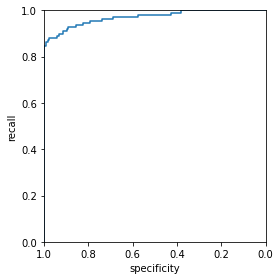

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))

0.9707223860358315


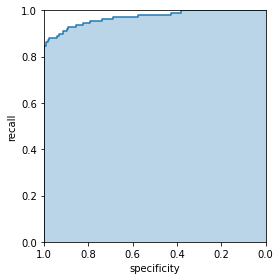

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

On obtient un AUC de 0.97, ce qui corespond à un très bon modèle de régression logistique


###Arbre de decision

On fait un modèle Decision Tree avec les hyperparamètres par défaut

In [ ]:
dtree = DecisionTreeClassifier()   
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_tree = dtree.predict(x_test)
cm_tree = confusion_matrix(y_test, pred_tree)

In [ ]:
cm_tree

array([[56824,    28],
       [   35,    75]])

In [ ]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.73      0.68      0.70       110

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test, pred_tree)

0.9988939995084443

On a la courbe ROC suivante :

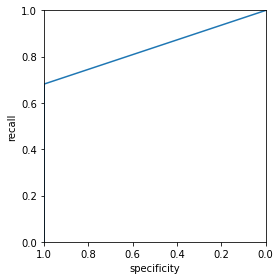

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:, 1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, dtree.predict_proba(x_test)[:, 1]))

0.8406628374791323


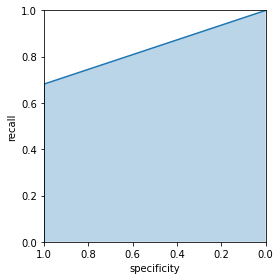

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

On obtient un AUC de 0.84, ce qui est un bon modèle

###Support Vector Machine (sans kernel)

On fait un modèle SVM sans kernel, c'est à dire un SVM lineaire, avec les hyperparamètres par défaut (mais probability à True pour pouvoir utiliser predict_proba() et avoir la courbe ROC)

In [ ]:
svmLinear = SVC(kernel='linear', probability=True)
svmLinear.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
pred_svmLinear = svmLinear.predict(x_test)
cm_svmLinear = confusion_matrix(y_test, pred_svmLinear)

In [ ]:
cm_svmLinear

array([[56831,    21],
       [   24,    86]])

In [ ]:
print(classification_report(y_test, pred_svmLinear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.80      0.78      0.79       110

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test, pred_svmLinear)

0.9992099996488887

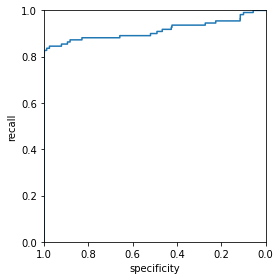

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, svmLinear.predict_proba(x_test)[:, 1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, svmLinear.predict_proba(x_test)[:, 1]))

0.913277377305028


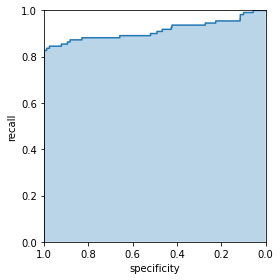

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, svmLinear.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

On obtient un AUC de 0.91, ce qui est très bon modèle

###Support Vector Machine (avec kernel)

On fait un modèle SVM (avec kernel rbf, celui de default) avec les hyperparamètres par défaut

In [ ]:
svm = SVC(probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, pred_svm)

In [ ]:
cm_svm

array([[56849,     3],
       [   36,    74]])

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.96      0.67      0.79       110

    accuracy                           1.00     56962
   macro avg       0.98      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test, pred_svm)

0.9993153330290369

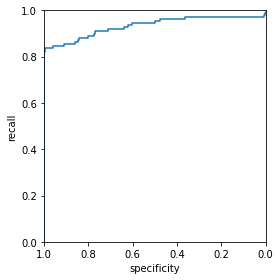

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:, 1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1]))

0.9335974428020442


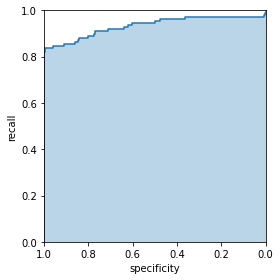

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

On obtient un AUC de 0.93 , ce qui est un très bon modèle et nous obtenons un meilleur AUC que le SVM sans kernel

Recap : Avec les hyperparamètres par défaut, le meilleur modèle pour le dataset Credit Fraud est la régression logistique

###Passons maintenant a la partie Grid Search

###Régression Logistique 

On procede à faire un grid search, on cherche les meilleurs hyperparamètres pour le modèle de Régression Logistique. On lui passe la liste des valeur que l'hyperparamètre peut prendre : par exemple solver peut être de type lbfgs, liblinear ... On lui precise aussi quel paramètre optimiser, nous nous interesssons à l'AUC (roc_auc_score). De plus on utilise une stratified k-fold cross validation car on a des classes très désequilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset (qu'il y ait assez d'individus de la classe minoritaire danschaque sous ensemble)

Le grid search teste chaque combinaison de hyperparamètres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits=3)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
264 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is n

Best Score: 0.9850674196429005
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


On trouve que les meilleurs hyperparamètres sont C = 0.001, penalty = l2, solver = newton-cg, avec un score AUC de 0.98

On refait donc un modèle de régression logistique avec ces hyperparamètres

In [ ]:
lrGS = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg')
lrGS.fit(x_train, y_train)

LogisticRegression(C=0.001, solver='newton-cg')

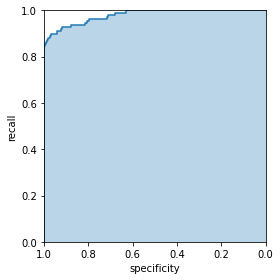

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, lrGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, lrGS.predict_proba(x_test)[:, 1]))

0.9791305015254921


Notre modèle LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg'), trouvé grace au grid search est  meilleur que le modèle avec les hyperparametres par default (LogisticRegression(C=1, penalty='l2', solver='lbfgs')), si on se basse sur la valeur de AUC trouvé lors du grid search

###Decision Tree

On fait un grid search pour le modèle decision tree. On regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par default

In [ ]:
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.7769777325722567
Best Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_split': 4}


On trouve que les meilleurs hyperparamètres sont criterion = gini, max_leaf_nodes = None, min_samples_split = 4, avec un score AUC de 0.77

On refait donc un modèle decision tree avec ces hyperparametres

In [ ]:
dtreeGS = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 4)
dtreeGS.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=4)

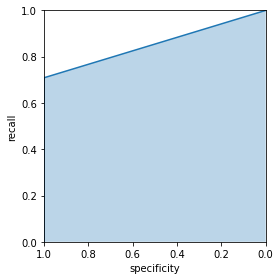

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, dtreeGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, dtreeGS.predict_proba(x_test)[:, 1]))

0.854391466199318


Notre modèle DecsionTreeClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 4), trouvé grace au grid search est similaire  au modèle avec les hyperparamètres par défault (DecsionTreeClassifier(criterion='gini', min_samples_split=2, max_leaf_nodes=None)) sur notre test set. Le grid search nous donne un AUC moins bon, car il teste sur des plusieurs test set différent qui recouvrent le dataset entier. Ce score AUC est donc plus fiable que l'AUC sur notre test  set  uniquement.

###SVM

D'après la documentation officielle, l'alorithme fit de SVC est en o(n^2), donc pour des dataset de plus de 10000 lignes il est conseillé d'utiliser LinearSVC() et même cela risque de ne jamais converger.

En effect déjà le temps d'exécution pour trouver un seul modele SVM peut prendre environs 1 ou 2 heures(avec probability=True). Par ailleurs, j'ai essayé de faire le grid search suivant et cela a pris plus de 5 heures et ne s'est pas terminé car l'environment d'execution de Google Collab s'est déconnecté.

In [ ]:
#On regarde les hyperparametres juges les plus importants : kernel, C, gamma et on laisse les autres par default. 
#On veut determiner quel type de kernel marche le mieux pour notre dataset.

model = SVC()
cv = StratifiedKFold(n_splits=3)
space = dict()
space['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
space['C'] = [0.1, 1, 10, 100, 1000]
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


**Conclusion:** Pour ce dataset on voit que le modele le plus performant (trouvé lors du grid search) est le modele LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg').

## Dataset Bank Marketing

In [ ]:
df2 = pd.read_csv('bank-additional-full.csv', sep = ';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df2['y'] = df2['y'].replace(['no', 'yes'], [0, 1])
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Comme ce dataset contient des variables catégorielles, il faut les transformer en variable numérique en encodant chaque catégorie sous forme de int. 
On utilise le LabelEncoder de la bibliothèque sklearn pour le faire de facon automatisé

In [ ]:
labelEncoder = LabelEncoder()

df2['job'] = labelEncoder.fit_transform(df2['job']) 
df2['marital'] = labelEncoder.fit_transform(df2['marital']) 
df2['education'] = labelEncoder.fit_transform(df2['education']) 
df2['default'] = labelEncoder.fit_transform(df2['default']) 
df2['housing'] = labelEncoder.fit_transform(df2['housing']) 
df2['loan'] = labelEncoder.fit_transform(df2['loan']) 
df2['contact'] = labelEncoder.fit_transform(df2['contact']) 
df2['month'] = labelEncoder.fit_transform(df2['month']) 
df2['day_of_week'] = labelEncoder.fit_transform(df2['day_of_week'])
df2['poutcome'] = labelEncoder.fit_transform(df2['poutcome'])

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


On partitionne notre dataset en train et test sets

In [ ]:
x2 = df2.drop(['y'], axis=1)
y2 =df2.y

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.2, random_state = 1989)

In [ ]:
Scaler_X2 = StandardScaler()
x2_train = Scaler_X2.fit_transform(x2_train)
x2_test = Scaler_X2.transform(x2_test)

###Régression Logistique

On fait une régression logistique avec les hyperparamètres par défaut

In [ ]:
lr2 = LogisticRegression()
lr2.fit(x2_train, y2_train)

LogisticRegression()

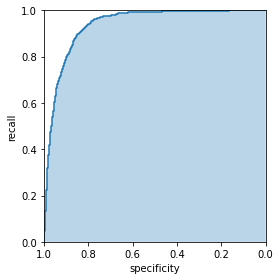

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, lr2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, lr2.predict_proba(x2_test)[:, 1]))

0.9376871910105765


On obtient un AUC de 0.94 , ce qui est un tres bon modele

###Arbre de Decision

On fait un decision tree avec les hyperparamètres par défaut

In [ ]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(x2_train, y2_train)

DecisionTreeClassifier()

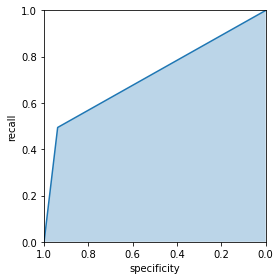

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, dtree2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, dtree2.predict_proba(x2_test)[:, 1]))

0.7163885899408192


On obtient un AUC de 0.72 , ce qui est un bon modele

###SVM (sans kernel)

On fait un SVM (sans kernel) avec les hyperparamètres par défaut

In [ ]:
svmLinear2 = SVC(kernel='linear', probability=True)
svmLinear2.fit(x2_train,y2_train)

SVC(kernel='linear', probability=True)

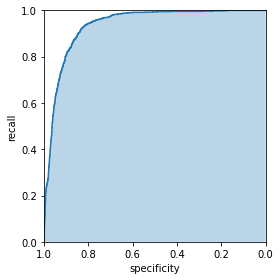

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, svmLinear2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, svmLinear2.predict_proba(x2_test)[:, 1]))

0.9355954348612331


On obtient un AUC de 0.94 , ce qui est un très bon modèle.

###SVM (avec kernel)

On fait un SVM (avec kernel) avec les hyperparamètres par défaut

In [ ]:
svm2 = SVC(probability=True)
svm2.fit(x2_train,y2_train)

SVC(probability=True)

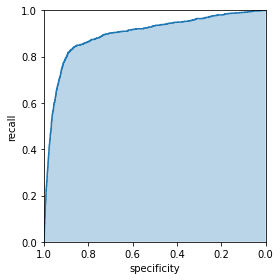

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, svm2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, svm2.predict_proba(x2_test)[:, 1]))

0.8971429367924743


On obtient un AUC de 0.90 , ce qui est un très bon modèle.
Par rapport au SVM sans kernel, on obtient un resultat legèrement pire.

Recap : Avec les hyperparamètres par défaut, les meilleurs modèles pour le dataset Bank Marketing sont donc la Régression Logisitque et le SVM sans kernel

###Passons maintenant à la partie Grid Search 

###Régression Logistique

On procede à faire un grid search, on cherche les meilleurs hyperparamètres pour le modèle de Régression Logistique. On lui passe la liste des valeur que l'hyperparamètre peut prendre : par exemple solver peut être de type lbfgs, liblinear ... On lui precise aussi quel paramètre optimiser, nous nous interesssons à l'AUC (roc_auc_score). On utilise une stratified k-fold cross validation au lieu d'une k-fold normale car on a des classes très deséquilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset

Le grid search teste chaque combinaison de hyperparamètres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2, y2)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.939488300899326
Best Hyperparameters: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cholesky'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
440 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is n

On trouve que les meilleurs hyperparamètres sont C = 1e-05, penalty = l2, solver = newton-cholesky, avec un score AUC de 0.93

On refait donc un modèle de regression logistique avec ces hyperparamètres

In [ ]:
lr2GS = LogisticRegression(penalty='l2', C= 1e-05, solver ='newton-cholesky')
lr2GS.fit(x2_train, y2_train)

LogisticRegression(C=1e-05, solver='newton-cholesky')

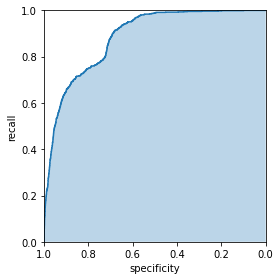

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, lr2GS.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, lr2GS.predict_proba(x2_test)[:, 1]))

0.884001693183177


Notre modèle LogisticRegression(penalty='l2', C= 1e-05, solver ='newton-cholesky'), trouvé grace au grid search est très similaire au modèle avec les hyperparamètres par défault (LogisticRegression(C=1, penalty='l2', solver='lbfgs')), en regardant l'AUC trouvé lors du grid search

###Decision Tree

On fait un grid search pour le modèle decision tree. On regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défault

In [ ]:
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2, y2)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

On trouve que les meilleurs hyperparamètres sont criterion = entropy, max_leaf_nodes = None  et min_samples_split = 4, avec un score AUC de 0.71

On refait donc un modèle decision tree avec ces hyperparamètres



In [ ]:
dtree2GS = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4)
dtree2GS.fit(x2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4)

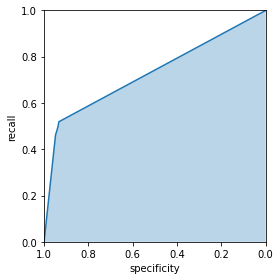

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, dtree2GS.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, dtree2GS.predict_proba(x2_test)[:, 1]))

0.727968187523705


Notre modèle DecsionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4), trouvé grace au grid search est légerment moins bon que le modèle avec les hyperparamètres par défault (DecsionTreeClassifier(criterion='gini', min_samples_split=2, max_leaf_nodes=None)), en considerant l'AUC trouvé lors du grid search, même si ce modele est plus performant sur notre test set en particulier.



**Conclusion:** Pour ce dataset on voit que le meilleur modèle (trouvé lors du grid search) est le modèle LogisticRegression(penalty='l2', C= 1e-05, solver ='newton-cholesky')


##Dataset Employee Attrition

In [ ]:
df3 = pd.read_csv('whole data.csv')
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
df3 = df3.dropna()
df3.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
df3 = df3.drop(columns=["EmployeeCount", "Over18", "StandardHours"])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


In [ ]:
df3['Attrition'] = df3['Attrition'].replace(['No', 'Yes'], [0, 1])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


On transforme les variables categorielles en entiers pour pouvoir effectuer nos modeles

In [ ]:
labelEncoder2 = LabelEncoder()

df3['BusinessTravel'] = labelEncoder2.fit_transform(df3['BusinessTravel']) 
df3['Department'] = labelEncoder2.fit_transform(df3['Department'])
df3['EducationField'] = labelEncoder2.fit_transform(df3['EducationField'])
df3['Gender'] = labelEncoder2.fit_transform(df3['Gender'])
df3['JobRole'] = labelEncoder2.fit_transform(df3['JobRole'])
df3['MaritalStatus'] = labelEncoder2.fit_transform(df3['MaritalStatus'])


df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,2,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,1,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,2,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,2,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,0,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,1,37020,0.0,20,0,5.0,4,4,1,2


On divise le dataset en train et test sets.

In [ ]:
x3 = df3.drop(['Attrition'], axis=1)
y3 =df3.Attrition

In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.2, random_state = 1989)

In [ ]:
Scaler_X3 = StandardScaler()
x3_train = Scaler_X3.fit_transform(x3_train)
x3_test = Scaler_X3.transform(x3_test)

###Regression Logistique

On fait une regression logistique avec les hyperparamètres par défaut

In [ ]:
lr3 = LogisticRegression()
lr3.fit(x3_train, y3_train)

LogisticRegression()

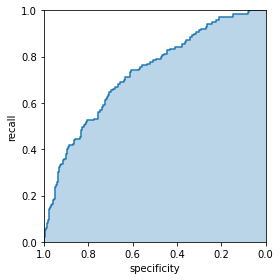

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, lr3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, lr3.predict_proba(x3_test)[:, 1]))

0.729472455322843


On obtient un AUC de 0.73 , ce qui est un bon modele

###Decision Tree

On fait un arbre de decision avec les hyperparamètres par défaut

In [ ]:
dtree3 = DecisionTreeClassifier()
dtree3.fit(x3_train, y3_train)

DecisionTreeClassifier()

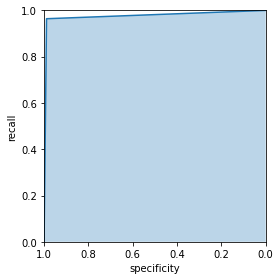

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, dtree3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, dtree3.predict_proba(x3_test)[:, 1]))

0.9764665382811643


On obtient un AUC de 0.97 , ce qui est un très bon modèle

###SVM (sans kernel)

On fait un SVM (sans kernel) avec les hyperparamètres par défaut

In [ ]:
svmLinear3 = SVC(kernel='linear', probability=True)
svmLinear3.fit(x3_train, y3_train)

SVC(kernel='linear', probability=True)

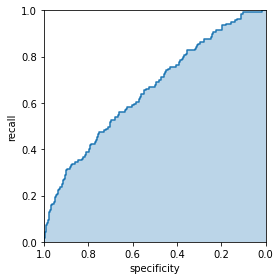

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, svmLinear3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, svmLinear3.predict_proba(x3_test)[:, 1]))

0.6553048823077461


On obtient un AUC de 0.65 , ce qui est un modèle pas très bon. Cela peut être du au fait que les classes sont déséquilibrées et que nous avons utilisé les hyperparamètres par défault, ou que la classe churn est difficilement séparable de manière linéaire.

###SVM (avec kernel)

On fait un SVM (avec kernel) avec les hyperparamètres par défaut

In [ ]:
svm3 = SVC(probability=True)
svm3.fit(x3_train, y3_train)

SVC(probability=True)

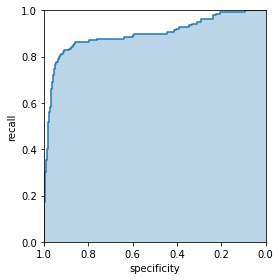

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, svm3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, svm3.predict_proba(x3_test)[:, 1]))

0.8972051207854799


On obtient un AUC de 0.89 , ce qui est un très bon modèle. On voit que le SVM avec kernel est beaucoup plus performant que le SVM sans kernel sur ce dataset


Recap : Avec les hyperparamètres par defaut, le meilleur modèle pour le dataset Employee Attrition est le Decision Tree Classifier qui a le meilleur AUC

###Passons maintenant à la partie Grid Search 

###Régression logistique

On procède a faire un grid search, on cherche les meilleurs hyperparamètres
pour le modèle de Régression Logistique. On lui passe la liste des valeur que l'hyperparamètre peut prendre : par exemple solver peut etre de type lbfgs, liblinear ... On lui précise aussi quel paramètre optimiser, nous nous interesssons a l'AUC (roc_auc_score). De  plus on utilise une repeated stratified k-fold cross validation (repétée 3 fois, car commme le dataset est moins grand on peut faire une repeated stratified k-fold sans que cela prenne beaucoup trop de temps ). On prefère utiliser une stratified k-fold qu'une k-fold normale car on a des classes très deséquilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset

Le grid search teste chaque combinaison de hyperparamètres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3, y3)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7505326136342635
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2640 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' i

On trouve que les meilleurs hyperparamètres sont C = 1, penalty = l1 et solver = liblinear, avec un score AUC de 0.75.

On refait donc un modèle de régression logistique avec ces hyperparamètres 

In [ ]:
lr3GS = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lr3GS.fit(x3_train, y3_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

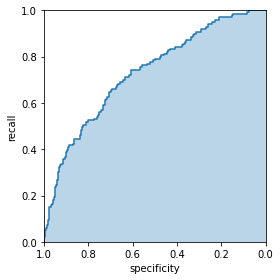

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, lr3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, lr3GS.predict_proba(x3_test)[:, 1]))

0.7295522805056925


Notre modèle LogisticRegression(C=1, penalty='l1', solver='liblinear'), trouvé grace au grid search est legèrement meilleur que le modèle avec les hyperparamètres par défault (LogisticRegression(C=1, penalty='l2', solver='lbfgs')), si on se basse sur la valeur de AUC trouvé lors du grid search

###Decision Tree

On fait un grid search pour le modèle decision tree. On regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défault


In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3, y3)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9880116297927631
Best Hyperparameters: {'criterion': 'log_loss', 'max_leaf_nodes': None, 'min_samples_split': 2}


On trouve que les meilleurs hyperparamètres sont criterion = log_loss, max_leaf_nodes = None, min_samples_split = 2 , avec un score AUC de 0.98

On refait donc un modèle decision tree avec ces hyperparamètres

In [ ]:
dtree3GS = DecisionTreeClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2)
dtree3GS.fit(x3_train, y3_train)

DecisionTreeClassifier(criterion='log_loss')

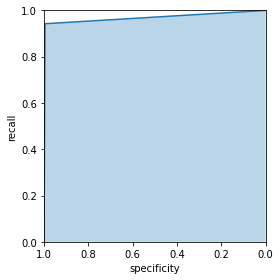

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, dtree3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, dtree3GS.predict_proba(x3_test)[:, 1]))

0.9691425777547171


Notre modèle DecsionTreeClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2), trouvé grace au grid search a un AUC similaire au modèle avec les hyperparamètres par default (DecsionTreeClassifier(criterion='gini', min_samples_split=2, max_leaf_nodes=None)).

**Conclusion:** Pour ce dataset le meilleur modèle trouvé est le
DecsionTreeClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2) avec ces hyperparamètres trouvés lors du grid search